In [25]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
import os
os.chdir("../")

In [27]:
from data_processing.start_experiment import *
from data_processing.read_data import *
from data_processing.gaussian import *

In [28]:
num_experiments = 100
parameter_list = ['gamma', 'gradnoise']

In [29]:
file_names = ["gradient_latin/latin_{}.par".format(i) for i in range(num_experiments)]
data_files = ["gradient_latin/data_cellcount_{}.txt".format(i) for i in range(num_experiments)]

In [30]:
X = get_parameter_array(file_names,parameter_list)

FileNotFoundError: [Errno 2] No such file or directory: '../data/parameters/gradient_latin/latin_0.par'

In [ ]:
Y = get_rewards(data_files, average_function_over_time(average_distance_between_cells))

In [ ]:
lowest_dist = np.argmin(Y)
print(lowest_dist) 
# matches the gradient-based adherence

34


In [ ]:
from GPy.models import GPRegression
from emukit.model_wrappers import GPyModelWrapper
import GPy
from emukit.experimental_design.acquisitions import IntegratedVarianceReduction



In [ ]:
kernel = GPy.kern.RBF(input_dim=2, ARD=True, lengthscale=[1,1], variance=1)
model_gpy = GPRegression(X, Y ,kernel = kernel,normalizer=True,noise_var=0.05)
model_gpy.parameters[0].variance.fix()
model_gpy.parameters[1].variance.fix()
model_emukit = GPyModelWrapper(model_gpy)
model_emukit.optimize()

In [ ]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt


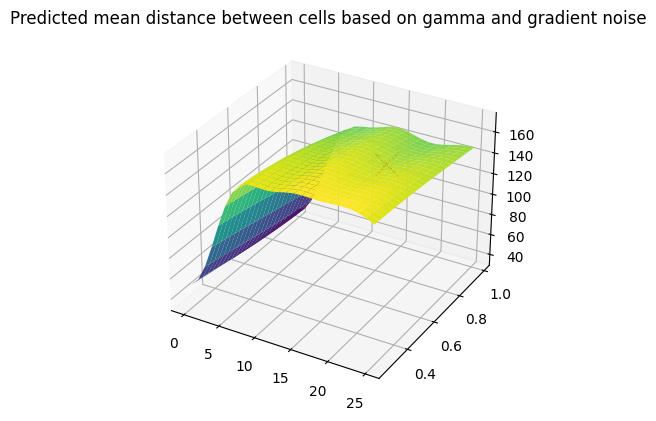

In [ ]:
parameter_space = ParameterSpace([
                                DiscreteParameter('gamma',list(range(0,25))),
                                ContinuousParameter('gradnoise',0.25,0.99)])

_gamma_test = np.linspace(0, 25, 25)
_gradnoise_test = np.linspace(0.25, 0.99, 25)

coords_gamma, coords_gradnoise = np.meshgrid(_gamma_test, _gradnoise_test)

_mean, _var = model_emukit.predict(np.c_[coords_gamma.ravel(), coords_gradnoise.ravel()])

reshaped_mean = _mean.reshape(coords_gamma.shape)


ax = plt.axes(projection='3d')
ax.plot_surface(coords_gamma, coords_gradnoise, reshaped_mean, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('Predicted mean distance between cells based on gamma and gradient noise')
ax.scatter(model_emukit.X[0][0], model_emukit.X[0][1], model_emukit.Y[0], color='red', s=300, marker='x')

Text(0.5, 0.92, 'Predicted mean distance between cells based on gamma and gradient noise')

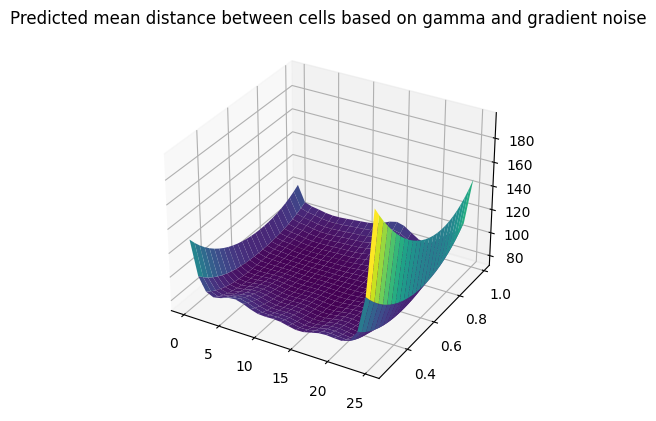

In [ ]:
reshaped_var = _var.reshape(coords_gamma.shape)

ax = plt.axes(projection='3d')
ax.plot_surface(coords_gamma, coords_gradnoise, reshaped_var, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('Predicted mean distance between cells based on gamma and gradient noise')